In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import heapq
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import glob
from sklearn.model_selection import train_test_split
filelist = []
for file in glob.glob('/content/gdrive/My Drive/TCGA/*'):
  filelist.append(file)

# Loading the dataset 


In [3]:
data = pd.read_csv('/content/gdrive/My Drive/TCGA_data.csv',dtype='float32')
list_main = []
for file in filelist:
  df_temp = pd.read_csv(file,sep='\t')
  list_main.append(len(df_temp.columns)-1)
df_labels = pd.read_csv('/content/gdrive/My Drive/labels.csv',header=1)
labels = list(df_labels['Abbreviation'])

# Splitting into training and test set

In [4]:
def split_train_test(df_pca2,rs):
    for l in range(31):
        df_temp = df_pca2.loc[df_pca2['label'] == l]
        if l == 0:
            X_train, X_test, y_train, y_test = train_test_split(df_temp.iloc[:,:-1],df_temp.iloc[:,-1], test_size=0.20, random_state=rs)
        else:
            X_train_temp, X_test_temp, y_train_temp, y_test_temp = train_test_split(df_temp.iloc[:,:-1],df_temp.iloc[:,-1], test_size=0.20, random_state=rs)
            X_train = pd.concat([X_train,X_train_temp])
            X_test = pd.concat([X_test,X_test_temp])
            y_train = pd.concat([y_train,y_train_temp])
            y_test = pd.concat([y_test,y_test_temp])
    return (X_train, X_test, y_train, y_test)
pred_label = []
for i in range(len(list_main)):
  for j in range(list_main[i]):
    pred_label.append(i)
data['label'] = pred_label 
np.random.seed(0)
r = np.random.randint(500)
(X_train, X_test, y_train, y_test) = split_train_test(data,r)
X_train = X_train.reset_index(drop=True)
df_gene_selection = X_train.copy()

# PCA plots

In [5]:
list_main = []
for i in range(0,31):
  list_main.append(len(y_train[y_train==i]))
color = ['b','g','r','c','m','y','k','r','b','g','r','c','m','y','k','r','b','g','r','c','m','y','k','r','b','g','r','c','m','y','k','r','b','g','r','c','m','y','k','r']
markers = [".",",","o","v","^","<",">","1","2","3","4","8","s","p","P","*","h","H","+","x","X","D","d","|","_",0, 5 , 6 , 7 , 9 , 10 , 11]

# PCA 1 Scatterplot

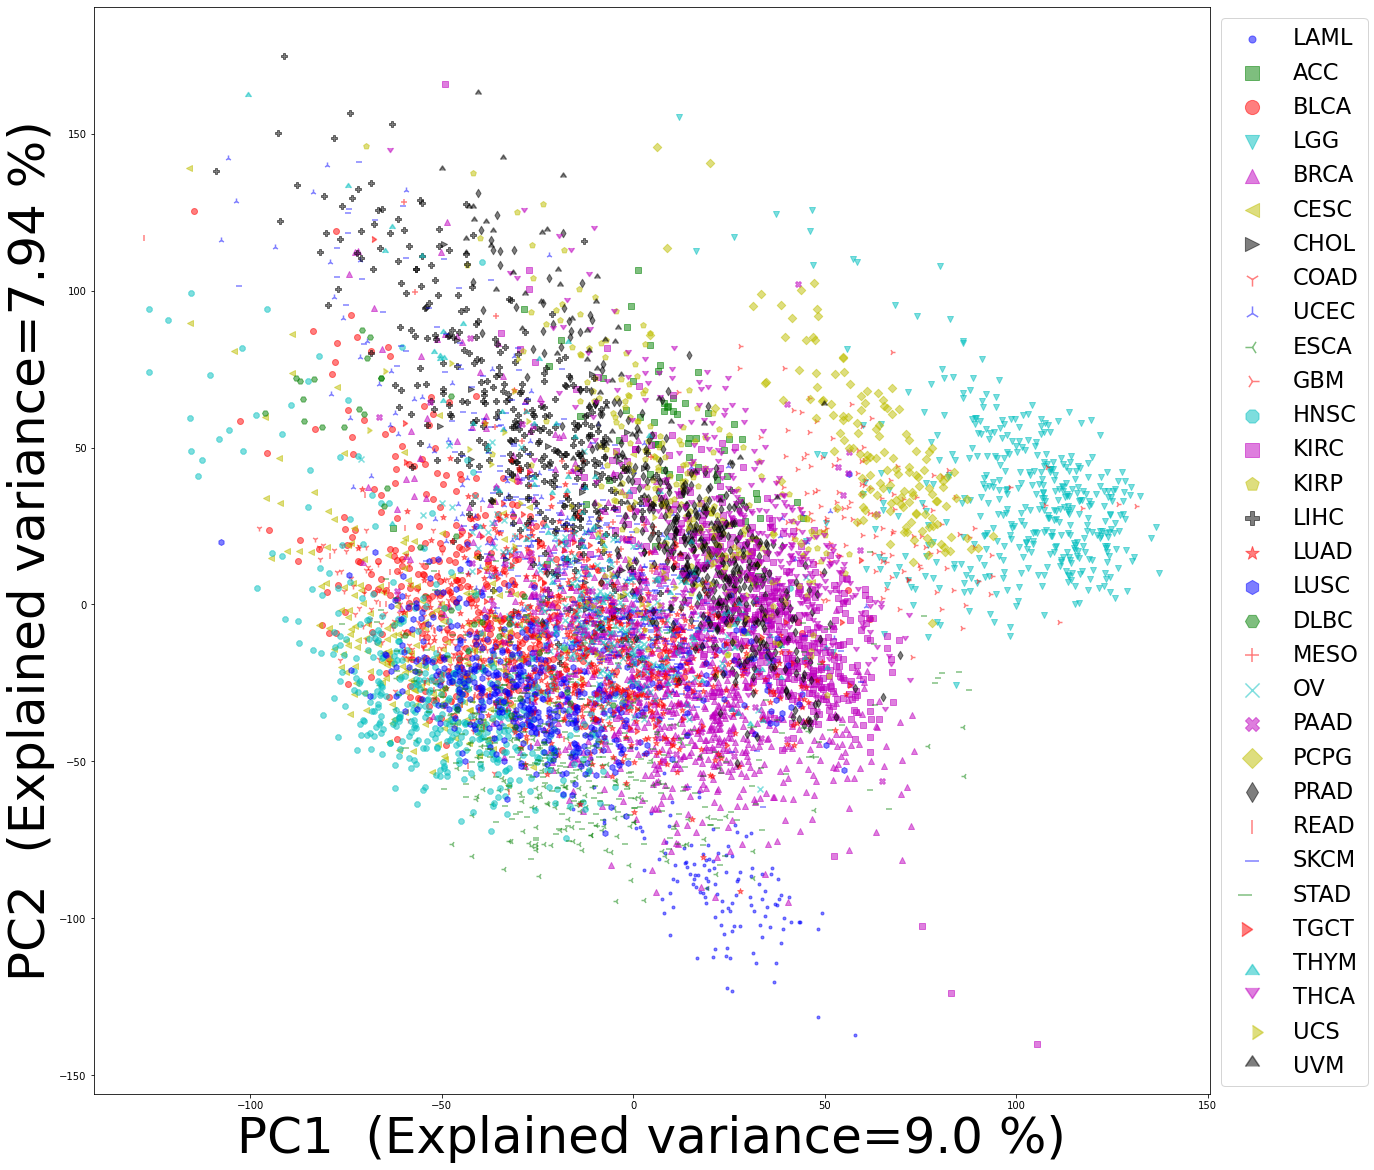

In [6]:
scaler =  StandardScaler()
pca=PCA(n_components=10,random_state=15)
pca1_result = pca.fit_transform(scaler.fit_transform(df_gene_selection))
pca1_dataframe = pd.DataFrame(pca1_result)
components = np.abs(pca.components_)
max_components=[]
max_loadings = []
for i in range(len(components)):
  list_arr = heapq.nlargest(23, range(len(components[i])), components[i].__getitem__)
  ls = heapq.nlargest(23, components[i])
  max_components.append(list_arr)
  max_loadings.append(ls)
list_max_gene = []
for i in range(len(max_components)):
  max_gene = {}
  for j in max_components[i]:
    gene = df_gene_selection.columns[j]
    loading = components[i][j]
    max_gene[gene] = (loading ** 2)
  list_max_gene.append(max_gene)
arr_var1 = pca.explained_variance_ratio_
fig = plt.figure(figsize=(20,20))
i1 = 0
i2 = 1
var = 0
i = 0
for col in list_main:
    if i == 89:
        break
    plt.scatter(pca1_dataframe.iloc[var:(var+col),0:1],pca1_dataframe.iloc[var:(var+col),1:2],c=color[i],marker=markers[i],label=labels[i],alpha=0.5)
    plt.xlabel('PC'+str(i1+1)+'  '+'(Explained variance='+str(round(list(arr_var1)[i1] * 100,2))+str(' %')+')',fontsize=50)
    plt.ylabel('PC'+str(i2+1)+'  '+'(Explained variance='+str(round(list(arr_var1)[i2] * 100,2))+str(' %')+')',fontsize=50)
    
    var = var+col
    i=i+1
text_title1 = ' , '.join(list_max_gene[i1])
text_title2 = ' , '.join(list_max_gene[i2])
lgnd = plt.legend(bbox_to_anchor=(1, 1),fontsize=22.5)
for handle in lgnd.legendHandles:
    handle.set_sizes([200.0])
plt.show()

# Taking selected genes from the original dataset for PCA 2

In [7]:
list_genes_pca1 = []
for i in list_max_gene:
  list_temp = list(i.keys())
  list_genes_pca1.extend(list_temp)
  list_genes_pca1 = sorted(set(list_genes_pca1), key=list_genes_pca1.index) 
df_pca2 = df_gene_selection[list_genes_pca1]

# PCA 2 Scatterplot

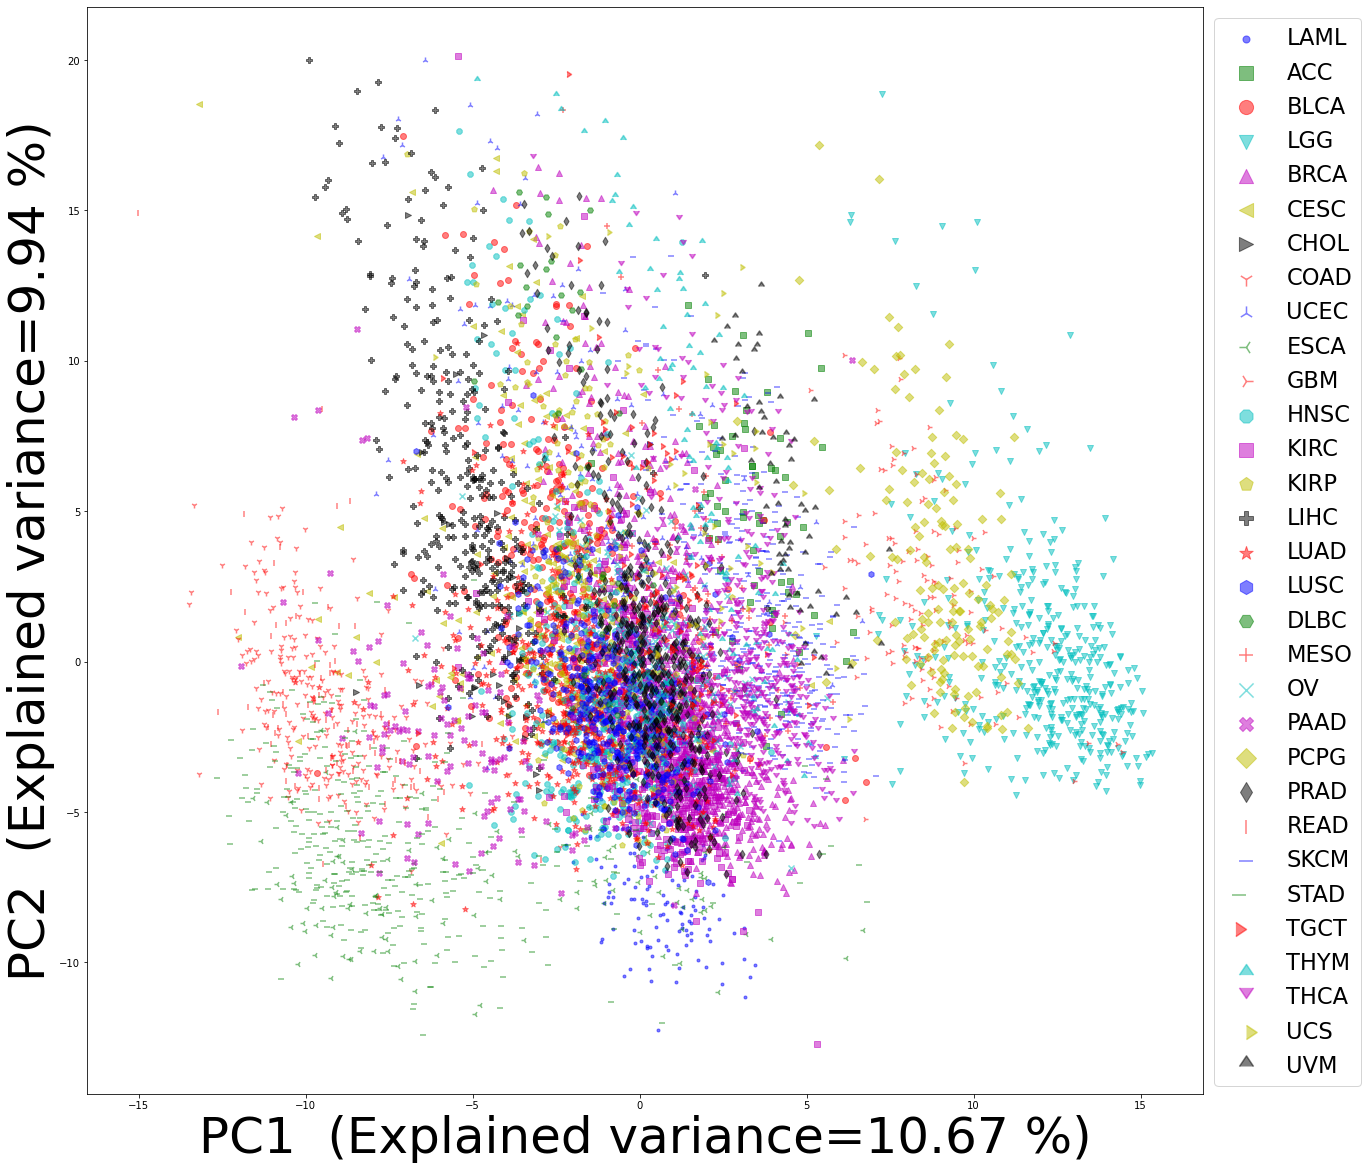

In [8]:
scaler =  StandardScaler()
pca2=PCA(n_components=10,random_state=15)
pca2_result = pca2.fit_transform(scaler.fit_transform(df_pca2))
pca2_dataframe = pd.DataFrame(pca2_result)
components2 = np.abs(pca2.components_)
max_components2=[]
max_loadings2 = []
for i in range(len(components2)):
  list_arr2 = heapq.nlargest(11, range(len(components2[i])), components2[i].__getitem__)
  ls2 = heapq.nlargest(11, components2[i])
  max_components2.append(list_arr2)
  max_loadings2.append(ls2)
list_max_gene2 = []
for i in range(len(max_components2)):
  max_gene2 = {}
  for j in max_components2[i]:
    gene2 = df_pca2.columns[j]
    loading2 = components2[i][j]
    max_gene2[gene2] = (loading2 ** 2)
  list_max_gene2.append(max_gene2)
list_genes_pca2 = []
for i in list_max_gene2:
  list_temp = list(i.keys())
  list_genes_pca2.extend(list_temp)
  list_genes_pca2 = sorted(set(list_genes_pca2), key=list_genes_pca2.index)
arr_var2 = pca2.explained_variance_ratio_
fig =  plt.figure(figsize=(20,20))
i1 = 0
i2 = 1
var = 0
i = 0
for col in list_main:
    if i == 89:
        break
    plt.scatter(pca2_dataframe.iloc[var:(var+col),0:1],pca2_dataframe.iloc[var:(var+col),1:2],c=color[i],marker=markers[i],label=labels[i],alpha=0.5)
    plt.xlabel('PC'+str(i1+1)+'  '+'(Explained variance='+str(round(list(arr_var2)[i1]*100,2))+' %)',fontsize=50)
    plt.ylabel('PC'+str(i2+1)+'  '+'(Explained variance='+str(round(list(arr_var2)[i2]*100,2))+' %)',fontsize=50)
    
    var = var+col
    i=i+1
lgnd = plt.legend(bbox_to_anchor=(1, 1),fontsize=22.5)
for handle in lgnd.legendHandles:
    handle.set_sizes([200.0])
text_title1 = ' , '.join(list_max_gene2[i1])
text_title2 = ' , '.join(list_max_gene2[i2])
plt.show()